In [11]:
import pandas as pd 
import wandb
import numpy as np
api = wandb.Api()

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
sns.set_context("notebook", font_scale=1.2)

In [12]:
metrics = ['test/result_acc/eval/'+ x for x in ['I', 'SS', 'LS', 'SL', 'LL']] + ['test/result_acc/avg']

In [13]:
def latex(means, stds, transpose=False, prefix='', suffix=''):
    means = np.array(means)
    stds = np.array(stds)
    if transpose:
        means = np.transpose(means)
        stds = np.transpose(stds)
    for i in range(means.shape[0]):
        print(prefix, end='')
        for j in range(means.shape[1]):
            m = means[i,j]
            s = stds[i,j]
            print(f'{m:.1f}$\\pm${s:.1f}', end=' ')
        print(suffix)

In [14]:
def filter_run(summary):
    return summary['resume'] != '' and summary.get('main_dataset_ratio', 1) == 0.5 \
            and summary['max_op_train'] in [10, None] and (summary['model'] != 'LSTM_attn' or summary['lr'] == 0.001)

runs = api.runs("qli/HINT_image_fewshot")
summary_list = [] 
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary = {'name': run.name}
    summary.update(run.summary._json_dict)
    summary.update(run.config)
    if filter_run(summary):
        summary_list.append(summary)
df = {k: [x.get(k, '') for x in summary_list] for k in summary_list[0]}
df = pd.DataFrame(df)
print('number of runs:', len(summary_list))

number of runs: 39


In [15]:
groupby = ['model', 'fewshot']
means = df.groupby(groupby)[metrics].median() * 100
stds = df.groupby(groupby)[metrics].std() * 100
display(means)
display(stds)
latex(means, stds, False)

test/result_acc/eval/I  \
model                   fewshot                           
LSTM_attn               a                     71.800000   
                        b                     73.400000   
                        c                     61.500000   
                        d                     59.200000   
                        x                     87.818182   
                        y                     64.454545   
TRAN.relative_universal a                     84.400000   
                        b                     77.100000   
                        c                     59.200000   
                        d                     62.800000   
                        x                     89.181818   
                        y                     83.818182   

                                 test/result_acc/eval/SS  \
model                   fewshot                            
LSTM_attn               a                      44.222222   
                        b                      29.888889   
                        c                      19.555556   
                        d                      22.666667   
                        x                      47.277778   
                        y                      39.111111   
TRAN.relative_universal a                      72.000000   
                        b                      59.111111   
                        c                      34.000000   
                        d                      39.000000   
                        x                      80.222222   
                        y                      74.777778   

                                 test/result_acc/eval/LS  \
model                   fewshot                            
LSTM_attn               a                           29.7   
                        b                           27.4   
                        c                           15.2   
                        d                           20.2   
                        x                           42.8   
                        y                           38.5   
TRAN.relative_universal a                           48.9   
                        b                           39.4   
                        c                           24.4   
                        d                           27.0   
                        x                           58.6   
                        y                           54.0   

                                 test/result_acc/eval/SL  \
model                   fewshot                            
LSTM_attn               a                       7.875000   
                        b                       7.375000   
                        c                       4.500000   
                        d                       7.250000   
                        x                      10.833333   
                        y                      11.555556   
TRAN.relative_universal a                       8.375000   
                        b                      16.750000   
                        c                       6.125000   
                        d                       9.250000   
                        x                      12.222222   
                        y                      13.777778   

                                 test/result_acc/eval/LL  test/result_acc/avg  
model                   fewshot                                                
LSTM_attn               a                          11.10            33.808511  
                        b                          12.70            31.106383  
                        c                           6.50            21.893617  
                        d                           8.90            24.659574  
                        x                          16.35            42.826531  
                        y                          18.90            35.408163  
TRAN.relative_universal a                  

test/result_acc/eval/I  \
model                   fewshot                           
LSTM_attn               a                      4.573839   
                        b                      0.513160   
                        c                      3.744774   
                        d                      3.927255   
                        x                      2.626890   
                        y                      0.319262   
TRAN.relative_universal a                      0.404145   
                        b                      0.700000   
                        c                      0.057735   
                        d                      0.264575   
                        x                      0.378485   
                        y                      0.814808   

                                 test/result_acc/eval/SS  \
model                   fewshot                            
LSTM_attn               a                       2.539401   
                        b                       2.715600   
                        c                       1.508549   
                        d                       1.613982   
                        x                       1.343939   
                        y                       1.112961   
TRAN.relative_universal a                       0.111111   
                        b                       0.192450   
                        c                       0.169725   
                        d                       0.525091   
                        x                       0.390209   
                        y                       0.256600   

                                 test/result_acc/eval/LS  \
model                   fewshot                            
LSTM_attn               a                       2.236813   
                        b                       2.203028   
                        c                       1.081665   
                        d                       1.153256   
                        x                       1.754328   
                        y                       2.042058   
TRAN.relative_universal a                       1.509967   
                        b                       0.057735   
                        c                       0.435890   
                        d                       0.100000   
                        x                       0.838650   
                        y                       0.602771   

                                 test/result_acc/eval/SL  \
model                   fewshot                            
LSTM_attn               a                       0.520416   
                        b                       0.360844   
                        c                       0.072169   
                        d                       1.063113   
                        x                       0.215643   
                        y                       0.449050   
TRAN.relative_universal a                       0.190941   
                        b                       0.505181   
                        c                       0.190941   
                        d                       0.144338   
                        x                       0.169725   
                        y                       0.111111   

                                 test/result_acc/eval/LL  test/result_acc/avg  
model                   fewshot                                                
LSTM_attn               a                       0.321455             1.938429  
                        b                       0.321455             0.865394  
                        c                       0.360555             1.215811  
                        d                       0.737111             1.342450  
                        x                       0.653452             1.226625  
                        y                       0.378594             0.577350  
TRAN.relative_universal a                  

71.8$\pm$4.6 44.2$\pm$2.5 29.7$\pm$2.2 7.9$\pm$0.5 11.1$\pm$0.3 33.8$\pm$1.9 
73.4$\pm$0.5 29.9$\pm$2.7 27.4$\pm$2.2 7.4$\pm$0.4 12.7$\pm$0.3 31.1$\pm$0.9 
61.5$\pm$3.7 19.6$\pm$1.5 15.2$\pm$1.1 4.5$\pm$0.1 6.5$\pm$0.4 21.9$\pm$1.2 
59.2$\pm$3.9 22.7$\pm$1.6 20.2$\pm$1.2 7.2$\pm$1.1 8.9$\pm$0.7 24.7$\pm$1.3 
87.8$\pm$2.6 47.3$\pm$1.3 42.8$\pm$1.8 10.8$\pm$0.2 16.4$\pm$0.7 42.8$\pm$1.2 
64.5$\pm$0.3 39.1$\pm$1.1 38.5$\pm$2.0 11.6$\pm$0.4 18.9$\pm$0.4 35.4$\pm$0.6 
84.4$\pm$0.4 72.0$\pm$0.1 48.9$\pm$1.5 8.4$\pm$0.2 12.3$\pm$0.2 46.4$\pm$0.3 
77.1$\pm$0.7 59.1$\pm$0.2 39.4$\pm$0.1 16.8$\pm$0.5 17.1$\pm$0.7 42.6$\pm$0.1 
59.2$\pm$0.1 34.0$\pm$0.2 24.4$\pm$0.4 6.1$\pm$0.2 9.4$\pm$0.2 27.3$\pm$0.0 
62.8$\pm$0.3 39.0$\pm$0.5 27.0$\pm$0.1 9.2$\pm$0.1 10.7$\pm$0.1 30.4$\pm$0.1 
89.2$\pm$0.4 80.2$\pm$0.4 58.6$\pm$0.8 12.2$\pm$0.2 19.3$\pm$0.4 52.8$\pm$0.3 
83.8$\pm$0.8 74.8$\pm$0.3 54.0$\pm$0.6 13.8$\pm$0.1 22.4$\pm$0.4 50.7$\pm$0.4 


In [16]:
def latex2(means):
    means = np.array(means)
    n_row, n_col = means.shape
    means_1 = means[:n_row//2]
    means_2 = means[n_row//2:]
    for i in range(n_row//2 + 1):
        for j in range(n_col):
            m1 = means_1[i, j] if i < n_row // 2 else means_1[:,j].mean()
            m2 = means_2[i, j] if i < n_row // 2 else means_2[:,j].mean()
            print(f'{m1:.1f}/{m2:.1f}', end=' ')
        print()

latex2(means)

71.8/84.4 44.2/72.0 29.7/48.9 7.9/8.4 11.1/12.3 33.8/46.4 
73.4/77.1 29.9/59.1 27.4/39.4 7.4/16.8 12.7/17.1 31.1/42.6 
61.5/59.2 19.6/34.0 15.2/24.4 4.5/6.1 6.5/9.4 21.9/27.3 
59.2/62.8 22.7/39.0 20.2/27.0 7.2/9.2 8.9/10.7 24.7/30.4 
87.8/89.2 47.3/80.2 42.8/58.6 10.8/12.2 16.4/19.3 42.8/52.8 
64.5/83.8 39.1/74.8 38.5/54.0 11.6/13.8 18.9/22.4 35.4/50.7 
69.7/76.1 33.8/59.9 29.0/42.0 8.2/11.1 12.4/15.2 31.6/41.7 


# max_op_train v.s. accuracy

In [17]:
def filter_run(summary):
    return isinstance(summary.get('max_op_train'), int) and summary.get('test/result_acc/avg') is not None

runs = api.runs("qli/HINT_image_fewshot")
summary_list = [] 
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary = {'name': run.name}
    summary.update(run.summary._json_dict)
    summary.update(run.config)
    if filter_run(summary):
        summary_list.append(summary)
df = {k: [x.get(k, '') for x in summary_list] for k in summary_list[0]}
df = pd.DataFrame(df)
print('number of runs:', len(summary_list))

number of runs: 62


In [18]:
import sys
sys.path.append('../')
from data.domain import FEWSHOT_OPERATORS, FEWSHOT_NUMBERS

fewshot_nums = FEWSHOT_NUMBERS
fewshot_ops = FEWSHOT_OPERATORS
fewshot_concepts = fewshot_nums + fewshot_ops

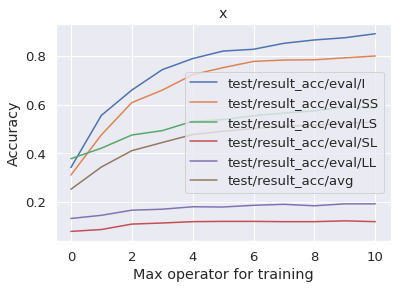

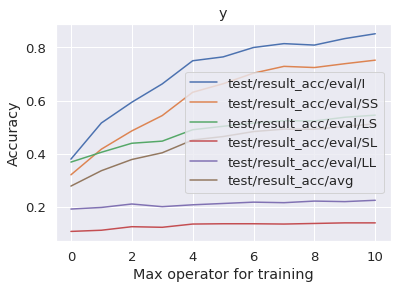

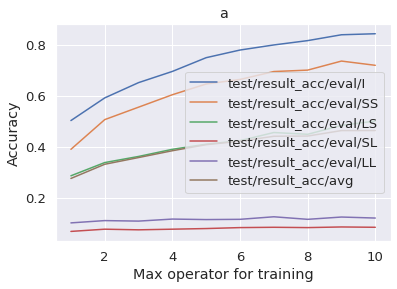

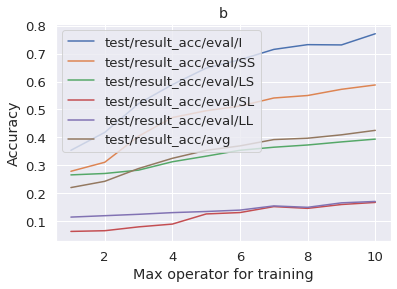

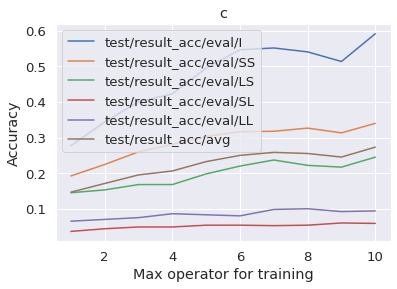

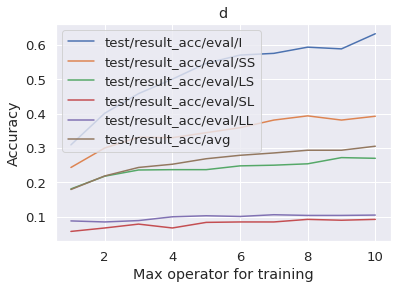

In [19]:
for fs in fewshot_concepts:
    fs_df = df[(df['fewshot'] == fs) & (df['model'] == 'TRAN.relative_universal')]
    for m in metrics:
        X = np.array(fs_df['max_op_train'])
        Y = np.array(fs_df[m])
        plt.plot(X, Y, label=m)
    plt.legend()
    plt.title(fs)
    plt.xlabel('Max operator for training')
    plt.ylabel('Accuracy')
    plt.show()

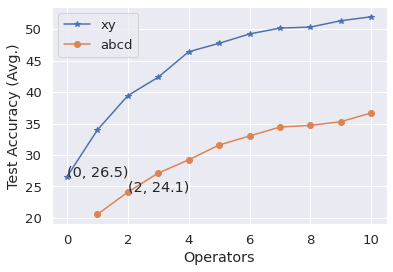

In [20]:
df = df[df['model'] == 'TRAN.relative_universal']
m = 'test/result_acc/avg'
markers = iter('*o')
for fs in [fewshot_nums, fewshot_ops]:
    fs_df = df[df['fewshot'].isin(fs)].groupby('max_op_train')[m].mean() * 100
    X = np.array(fs_df.index.get_level_values(0))
    Y = np.array(fs_df)
    plt.plot(X, Y, label=''.join(fs), marker=next(markers))
    i = 0 if fs == fewshot_nums else 1
    plt.annotate(f'({X[i]}, {Y[i]:.1f})', (X[i], Y[i]))
plt.legend()
plt.xlabel('Operators')
plt.ylabel('Test Accuracy (Avg.)')
plt.savefig('figures/fewshot_max_op.pdf', dpi=300, bbox_inches='tight')
plt.show()